<a href="https://colab.research.google.com/github/Muhammadsulton1/MIPT_Data_analys/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import statsmodels as stm

import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/candies.dat', sep=';')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [ ]:
df = data.copy()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

link = linkage(data, 'ward', 'euclidean')

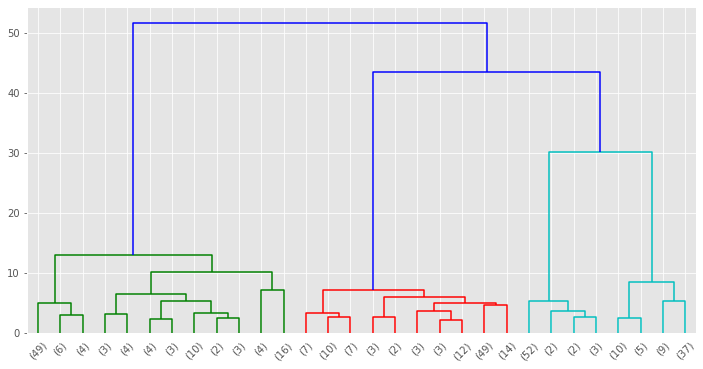

In [ ]:
plt.figure(figsize=(12,6))
dn = dendrogram(link,truncate_mode='lastp')

In [ ]:
data['cluster'] = fcluster(link, 14, criterion='distance')
data.groupby('cluster').mean().T

cluster,1,2,3,4
V1,2.824074,4.845455,3.000000,3.000000
V2,2.833333,4.800000,2.966102,3.000000
V3,2.768519,4.836364,2.966102,3.000000
V4,2.620370,4.681818,2.915254,3.000000
V5,2.611111,3.036364,2.915254,4.852459
V6,2.583333,3.036364,2.949153,4.852459
V7,2.750000,3.000000,4.915254,3.000000
V8,2.916667,2.990909,4.915254,2.918033
V9,4.953704,3.072727,3.000000,2.754098
V10,4.814815,3.045455,3.000000,2.754098


Интерпрентация результатов иерахической кластеризации:

1 кластер: люди используют леденцы в мед целях для облегчение симптомов заложенности носа и горла (леденцы типа стрепсилс)

2 кластер: люди используют леденцы, чтобы освежить свое дыхание (леденцы типа холлс или тик так)

3 кластер: люди используют леденцы, когда хотят улучшить свою умственную активность за счет сахара (леденцы - конфеты)

4 кластер: люди которые отказываются от сахара и пытаются вменьшем количестве его употреблять и когда очень сильно хотят сладкого, то просто употребляют леденец (леденцы без сахара или с сахара заменителем)

In [ ]:
from sklearn.cluster import KMeans

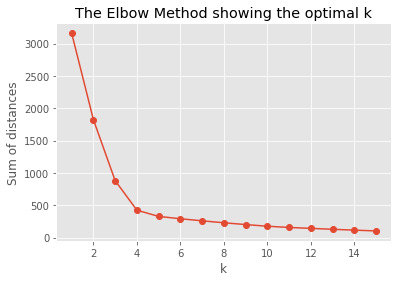

In [ ]:
K = range(1, 16)
models = [KMeans(n_clusters = k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean().T

cluster,0,1,2,3
V1,2.824074,4.845455,3.000000,3.000000
V2,2.833333,4.800000,3.000000,2.966102
V3,2.768519,4.836364,3.000000,2.966102
V4,2.620370,4.681818,3.000000,2.915254
V5,2.611111,3.036364,4.852459,2.915254
V6,2.583333,3.036364,4.852459,2.949153
V7,2.750000,3.000000,3.000000,4.915254
V8,2.916667,2.990909,2.918033,4.915254
V9,4.953704,3.072727,2.754098,3.000000
V10,4.814815,3.045455,2.754098,3.000000


интерпретация результатов кластеризации методов К-средних:

0 кластер: люди используют леденцы в мед целях для облегчение симптомов заложенности носа и горла (леденцы типа стрепсилс)

1 кластер: люди используют леденцы, чтобы освежить свое дыхание (леденцы типа холлс или тик так)

2 кластер: люди которые отказываются от сахара и пытаются вменьшем количестве его употреблять и когда очень сильно хотят сладкого, то просто употребляют леденец (леденцы без сахара или с сахара заменителем)

3 кластер:люди используют леденцы, когда хотят улучшить свою умственную активность за счет сахара (леденцы - конфеты)

Результаты обоими методами класстеризации оказались одинаковые, каждый из методов разбил наши данные на 4 кластера.